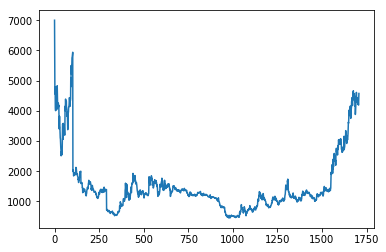

In [52]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv("C:/Users/hiroa/kabu/csv/3655_ブレインパッド.csv", usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [53]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv("C:/Users/hiroa/kabu/csv/3655_ブレインパッド.csv", usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
#print(len(train), len(test))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Epoch 1/100
 - 2s - loss: 0.0130
Epoch 2/100
 - 1s - loss: 0.0026
Epoch 3/100
 - 1s - loss: 5.9897e-04
Epoch 4/100
 - 1s - loss: 5.8981e-04
Epoch 5/100
 - 1s - loss: 5.8312e-04
Epoch 6/100
 - 1s - loss: 5.6363e-04
Epoch 7/100
 - 1s - loss: 5.6746e-04
Epoch 8/100
 - 1s - loss: 5.5969e-04
Epoch 9/100
 - 1s - loss: 5.5554e-04
Epoch 10/100
 - 1s - loss: 5.4612e-04
Epoch 11/100
 - 1s - loss: 5.2788e-04
Epoch 12/100
 - 1s - loss: 5.4635e-04
Epoch 13/100
 - 2s - loss: 5.3126e-04
Epoch 14/100
 - 1s - loss: 5.3366e-04
Epoch 15/100
 - 1s - loss: 5.3751e-04
Epoch 16/100
 - 1s - loss: 5.2946e-04
Epoch 17/100
 - 1s - loss: 5.2336e-04
Epoch 18/100
 - 1s - loss: 5.1863e-04
Epoch 19/100
 - 1s - loss: 5.3058e-04
Epoch 20/100
 - 1s - loss: 5.3510e-04
Epoch 21/100
 - 1s - loss: 5.2200e-04
Epoch 22/100
 - 1s - loss: 5.2103e-04
Epoch 23/100
 - 1s - loss: 5.2182e-04
Epoch 24/100
 - 1s - loss: 5.1828e-04
Epoch 25/100
 - 2s - loss: 5.2639e-04
Epoch 26/100
 - 2s - loss: 5.2647e-04
Epoch 27/100
 - 2s - loss: 5.

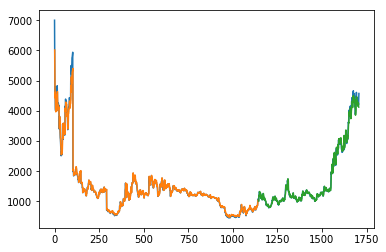

In [54]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [55]:
print("Price for last 5 days: ")
print(testPredict[-5:])
print("============================")
print(numpy.asarray([[testPredict[-5]]]))
print("============================")
print(testPredict[-5:,0])
print("============================")
print("Price for tomorrow: ")
print(testPredict[-1])
print("============================")
print("testY: ")
print(testY[-5:])

Price for last 5 days: 
[[4253.8154]
 [4149.8887]
 [4257.93  ]
 [4137.279 ]
 [4124.6396]]
[[[4253.8154]]]
[4253.8154 4149.8887 4257.93   4137.279  4124.6396]
Price for tomorrow: 
[4124.6396]
testY: 
[[1120.99998038 1199.99996037 1183.99998171 1201.99998209 1324.99990341
  1262.99996171 1192.9999819  1234.00003696 1275.99995656 1275.99995656
  1234.00003696 1124.00001295 1126.00003467 1100.99995828 1101.99996914
  1182.99997085 1200.99997123 1134.000024   1135.00003486 1053.00002229
  1079.000012   1125.00002381 1173.99997066 1146.99997009 1225.00003677
  1260.00002667 1219.99998247 1146.99997009 1098.00002324 1061.00001162
  1080.00002286 1128.99996971 1073.99995771 1088.00001219 1034.00001105
  1044.0000221  1042.00000038 1022.99998914 1008.00002134  996.99999943
   984.99996666  899.00000819  875.0000402   903.99996495  905.99998666
   899.00000819  864.00001829  861.99999657  852.99999638  839.99995275
   877.99997523  895.99997561  901.00002991  839.99995275  825.99999581
   822.99

In [36]:
#futurePredict = model.predict(numpy.asarray([[testPredict[-1]]]))
#futurePredict = scaler.inverse_transform(futurePredict)
#print("Stock price for tomorrow: ", futurePredict)

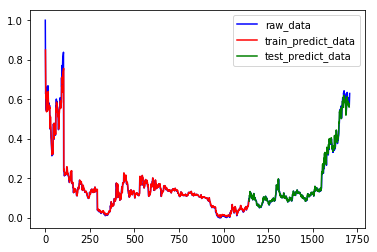

In [56]:
train_predicted = model.predict(trainX)
test_predicted = model.predict(testX)

plt.figure()
plt.plot(range(0, len(dataset)), dataset, color="b", label="raw_data")
plt.plot(range(1,len(train_predicted)+1),train_predicted, color="r", label="train_predict_data")
plt.plot(range(len(train_predicted)+1,len(train_predicted) + len(test_predicted)+1),test_predicted, color="g", label="test_predict_data")

plt.legend()
plt.show()

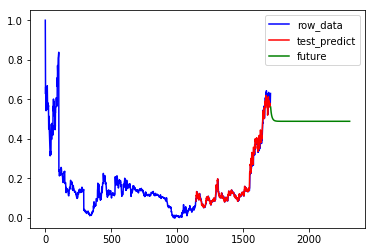

In [62]:
import numpy as np

train_predicted = model.predict(trainX)
test_predicted = model.predict(testX)
#plt.plot(range(len(train_predicted),len(train_predicted) + len(test_predicted)),test_predicted, color="g", label="test_predict_data")

#future_test = trainX[-1].T
future_test = testX[-1].T
time_length = future_test.shape[1]
future_result = np.empty((0))

for step2 in range(600):
    test_data = np.reshape(future_test, (1, time_length, 1))
    batch_predict = model.predict(test_data)

    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, batch_predict)

    future_result = np.append(future_result, batch_predict)

plt.figure()
plt.plot(range(0, len(dataset)), dataset, color="b", label="row_data")
plt.plot(range(len(train_predicted),len(train_predicted) + len(test_predicted) ),predicted, color="r", label="test_predict")
plt.plot(range(0+len(dataset), len(future_result)+len(dataset)), future_result, color="g", label="future")
plt.legend()
plt.show()

In [9]:
# model.save('3566-bp.hdf5')

# from keras.models import load_model
# model = load_model('3566-bp.hdf5')

LSTM(maxlenごとの期間でスライディングする時系列分析)

In [72]:
import numpy as np

dataframe = pandas.read_csv("C:/Users/hiroa/kabu/csv/3655_ブレインパッド.csv", usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

maxlen = 2
def make_dataset(low_data):
    data, target = [], []

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target

x_train, y_train = make_dataset(dataset)

print(x_train.shape)
print(x_train)
print("=============================================================")
print(y_train)

(1706, 2, 1)
[[[7000.]
  [5560.]]

 [[5560.]
  [4560.]]

 [[4560.]
  [4795.]]

 ...

 [[4350.]
  [4205.]]

 [[4205.]
  [4190.]]

 [[4190.]
  [4460.]]]
[[4560.]
 [4795.]
 [4320.]
 ...
 [4190.]
 [4460.]
 [4575.]]


In [64]:
from keras.layers import Dense, SimpleRNN, GRU, LSTM, Activation
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping

length_of_sequence = x_train.shape[1]
in_out_neurons =1
n_hidden = 512

model = Sequential()
model.add(GRU(n_hidden,
             batch_input_shape=(None, length_of_sequence, in_out_neurons),return_sequences=False))
#model.add(LSTM(n_hidden,
#             batch_input_shape=(None, length_of_sequence, in_out_neurons),return_sequences=False))
model.add(Dense(in_out_neurons))
# 計算した結果をそのままだしたいので、活性化関数は linear とする。
model.add(Activation('linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
#opt = Adam(amsgrad=True)
#model.compile(optimizer='sgd', loss='mean_squared_error')

In [65]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=5)
model.fit(x_train, y_train,
          batch_size=30,
          epochs=50,
          validation_split=0.1,
          callbacks=[early_stopping],
          verbose=1
          )

Train on 1535 samples, validate on 171 samples
Epoch 1/50
1535/1535 [==============================] - 3s 2ms/step - loss: 2436737.9178 - val_loss: 10582254.1930
Epoch 2/50
1535/1535 [==============================] - 2s 1ms/step - loss: 2397633.2809 - val_loss: 10495282.4298
Epoch 3/50
1535/1535 [==============================] - 2s 1ms/step - loss: 2361263.9247 - val_loss: 10409672.1579
Epoch 4/50
1535/1535 [==============================] - 2s 1ms/step - loss: 2325409.7419 - val_loss: 10325279.0351
Epoch 5/50
1535/1535 [==============================] - 2s 1ms/step - loss: 2290193.1270 - val_loss: 10241994.3333
Epoch 6/50
1535/1535 [==============================] - 2s 1ms/step - loss: 2255217.5668 - val_loss: 10159051.4561
Epoch 7/50
1535/1535 [==============================] - 2s 1ms/step - loss: 2221049.8612 - val_loss: 10076661.7982
Epoch 8/50
1535/1535 [==============================] - 2s 1ms/step - loss: 2187374.4487 - val_loss: 9995084.5614
Epoch 9/50
1535/1535 [============

In [76]:
#predicted = model.predict(x_train)
#plt.figure()
#plt.plot(range(0, len(dataset)), dataset, color="b", label="raw_data")
#plt.plot(range(maxlen,len(predicted) + maxlen),predicted, color="r", label="predicted_data")
#plt.legend()
#plt.show()

train_predicted = model.predict(x_train)
#ytrain_predicted = model.predict(y_train)

plt.figure()
plt.plot(range(0, len(dataset)), dataset, color="b", label="raw_data")
plt.plot(range(1,len(train_predicted)+1),train_predicted, color="r", label="train_predict_data")
#plt.plot(range(len(train_predicted)+1,len(train_predicted) + len(test_predicted)+1),test_predicted, color="g", label="test_predict_data")

plt.legend()
plt.show()

ValueError: Error when checking : expected gru_3_input to have 3 dimensions, but got array with shape (1706, 1)

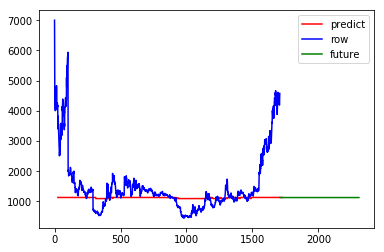

In [23]:
future_test = x_train[-1].T
time_length = future_test.shape[1]
future_result = np.empty((0))

for step2 in range(600):

    test_data = np.reshape(future_test, (1, time_length, 1))
    batch_predict = model.predict(test_data)

    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, batch_predict)

    future_result = np.append(future_result, batch_predict)


plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict")
plt.plot(range(0, len(dataset)), dataset, color="b", label="row")
plt.plot(range(0+len(dataset), len(future_result)+len(dataset)), future_result, color="g", label="future")
plt.legend()
plt.show()